In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from graph_reinforcement_learning_using_blockchain_data import config
from graph_reinforcement_learning_using_blockchain_data.modeling import train

config.load_dotenv()

2025-03-10 12:48:29.554 | INFO     | graph_reinforcement_learning_using_blockchain_data.config:<module>:11 - PROJ_ROOT path is: /Users/liamtessendorf/Programming/Uni/2_Master/4_FS25_Programming/graph-reinforcement-learning-using-blockchain-data


True

In [2]:
df_features = pd.read_csv(
    config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "features_edges_graph.csv"
)

In [3]:
df_features.head()

,transactionHash,blockNumber,gasUsed,cumulativeGasUsed,transactionIndex,effectiveGasPrice,status,fee,from,to,...,dummy_0x19b47279,dummy_0x8c5be1e5,label,from_in_degree,from_out_degree,to_in_degree,to_out_degree,common_neighbors,from_clustering,to_clustering
0,0x8e90ecb85b61af368db0154830453552f0c27e0e1812...,17005294,153529,10750253,111,19150328915,1,2940130847991035,0x832aC338d06f5A438f3340B724c08C44e744e9c2,0x00000000000001ad428e4906aE43D8F9852d0dD6,...,0,1,0,0,1,2578,0,0,0.0,3.010459e-07
1,0xd83c25449d0766a18945f10aff7912f2ff492f0234a8...,16962424,123497,229900,1,139502435999,1,17228132338568503,0x080086911D8c78008800FAE75871a657b77d0082,0x0000E0Ca771e21bD00057F54A68C30D400000000,...,0,0,0,0,2,14,0,0,0.0,0.000000e+00
2,0x8b434ba680a93cc0e85a7c431e5b35a8efb60ef05c24...,16993741,21000,15838026,183,22098066562,1,464059397802000,0xE991Dc594Ea50b7B83be1B0a44Fd138582c04383,0xD8A5859Ce6f265D376922Dc27f70b804cc65f49E,...,0,0,0,0,1,1,0,0,0.0,0.000000e+00
3,0x8d3b8e46a66a909643f2bb7497b18c954fc22fa5bd5c...,16972733,46817,14885776,165,18825121161,1,881335697394537,0xCA8ba7d3f798d1872A8C05c5358a1b24a4d3Ac64,0x2b591e99afE9f32eAA6214f7B7629768c40Eeb39,...,0,0,0,0,1,192,0,0,0.0,0.000000e+00
4,0x25908bad48b2353a1da142da6f0a19c015dfbac5245f...,17028487,32215,3160909,48,19660583885,1,633365709855275,0x8FEf490D614fCe8B93Bd6F28835dD35a8B3229a9,0xBA50933C268F567BDC86E1aC131BE072C6B0b71a,...,0,0,0,1,1,7,0,0,0.0,0.000000e+00


In [5]:
df_features = df_features[df_features["num_logs"].apply(lambda x: x is not None and x > 0)]

In [6]:
df = df_features.drop(columns=["transactionHash", "from", "to", "blockNumber", "transactionIndex"])
df.head()

,gasUsed,cumulativeGasUsed,effectiveGasPrice,status,fee,num_logs,dummy_0xddf252ad,dummy_0xc42079f9,dummy_0xe1fffcc4,dummy_0x17307eab,...,dummy_0x19b47279,dummy_0x8c5be1e5,label,from_in_degree,from_out_degree,to_in_degree,to_out_degree,common_neighbors,from_clustering,to_clustering
0,153529,10750253,19150328915,1,2940130847991035,3,1,0,0,0,...,0,1,0,0,1,2578,0,0,0.0,3.010459e-07
1,123497,229900,139502435999,1,17228132338568503,7,1,0,0,0,...,0,0,0,0,2,14,0,0,0.0,0.000000e+00
3,46817,14885776,18825121161,1,881335697394537,1,1,0,0,0,...,0,0,0,0,1,192,0,0,0.0,0.000000e+00
4,32215,3160909,19660583885,1,633365709855275,1,1,0,0,0,...,0,0,0,1,1,7,0,0,0.0,0.000000e+00
5,153886,9279317,45282851253,1,6968396847919158,5,1,1,1,0,...,0,0,0,0,1,6336,0,0,0.0,5.481014e-07


In [7]:
X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
features_to_scale = [
    "gasUsed",
    "cumulativeGasUsed",
    "effectiveGasPrice",
    "fee",
    "num_logs",
    "from_in_degree",
    "from_out_degree",
    "to_in_degree",
    "to_out_degree",
    "common_neighbors",
    "from_clustering",
    "to_clustering",
]

In [8]:
rf_trainer = train.RandomForestTrainer()
grid_search = rf_trainer.grid_search(features_to_scale)

In [12]:
best_model = rf_trainer.train(
    X_train, X_test, y_train, y_test, grid_search, "Edge Classification with Graph Features"
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/liamtessendorf/Programming/Uni/2_Master/4_FS25_Programming/graph-reinforcement-learning-using-blockchain-data/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
2025/02/19 18:23:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run spiffy-hare-281 at: http://127.0.0.1:8080/#/experiments/773040148381341262/runs/77445dfc34124cf8964f3758fd08b0f3
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/773040148381341262


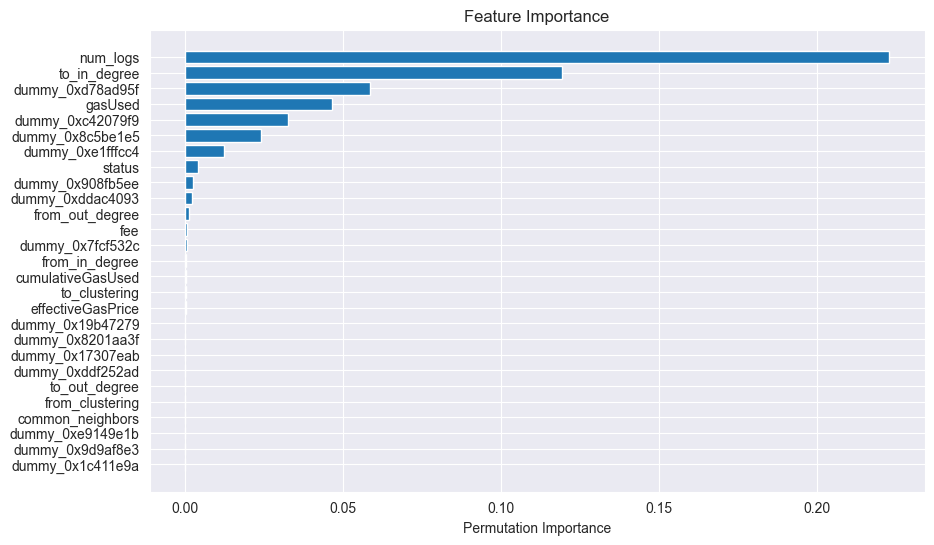

In [18]:
perm_importance = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()